# MSCA 37014 Assignment3
# Team Member:  Amily Huang, Duo Zhou and Dylan Zhang
## Getting external libraries

In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as scplt
from sklearn.metrics import accuracy_score
import seaborn as sns
np.set_printoptions(precision=3)

## Pre Processing Data

In [2]:
dat=pd.read_csv('PERM_FY2020_Q31.csv')

C:\Users\zd000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,19,85,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Defining Dummy variables for Student variable,and concatenate the dummy columns with original dataframe. 


In [3]:
dat

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE
0,A-09245-62715,Denied,9/3/2009,4/30/2020,N,NaN,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,NaN,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President
1,A-10119-96737,Certified-Expired,3/29/2010,10/18/2019,Y,9/15/2000,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,NaN,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD
2,A-10225-13679,Denied,8/10/2010,4/30/2020,N,NaN,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER
3,A-11033-51540,Certified,2/3/2011,5/28/2020,N,NaN,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,Y,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations
4,A-11074-62984,Denied,3/10/2011,6/17/2020,N,NaN,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,NaN,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71937,A-20181-70773,Withdrawn,6/29/2020,6/29/2020,N,NaN,NaN,N,Hyder Investments Inc. DBA McDonalds,7088 E Fish Lake Rd,...,NaN,NaN,N,N,Y,,NaN,NaN,Shahab Hyder,President
71938,A-20181-71005,Withdrawn,6/29/2020,6/30/2020,N,NaN,NaN,N,"ONLY IT CONSULTING, LLC",2200 W HIGGINS RD,...,N,N,N,Y,Y,,NaN,NaN,POOJA SRIVASTAVA,PRESIDENT
71939,A-20181-71066,Withdrawn,6/29/2020,6/30/2020,N,NaN,NaN,N,"EVEREST COMPUTERS, INC.",875 OLD ROSWELL ROAD,...,NaN,N,N,N,Y,,NaN,NaN,RAVI KANDIMALLA,PRESIDENT
71940,A-20181-71075,Withdrawn,6/30/2020,6/30/2020,N,NaN,NaN,N,"OUNZE CORPORATE, LLC",8934 HARDING AVE,...,NaN,NaN,N,N,N,AIDA E TEJADA,FORM PREPARER,INFOJCUSA@GMAIL.COM,GABRIELA HERNANDEZ,ADMINISTRATION MANAGER


#### Change the response varaible (CASE_STATUS) categories into only two levels: Certified vs Not_Certified

In [4]:
dat['CASE_STATUS_BI']=0
# change the response categories into only two levels: certifies vs denied
dat.loc[(dat['CASE_STATUS']=='Certified-Expired'),'CASE_STATUS_BI']='Certified'
dat.loc[(dat['CASE_STATUS']=='Certified'),'CASE_STATUS_BI']='Certified'
dat.loc[(dat['CASE_STATUS']=='Denied'),'CASE_STATUS_BI']='Not_Certified'
dat.loc[(dat['CASE_STATUS']=='Withdrawn'),'CASE_STATUS_BI']='Not_Certified'
dat['CASE_STATUS_BI'].unique()

array(['Not_Certified', 'Certified'], dtype=object)

#### We chose CASE_STATUS as response variable.
#### Variables regarding to the type of professions, wage, education requirement, experience and training requirement are chosen as predictor variables Note: all wages are normalized to hourly wages and NAs are dropped

In [5]:
dat['CASE_STATUS_BI'] = pd.get_dummies(dat['CASE_STATUS_BI'])
dat['REQUIRED_TRAINING'] = pd.get_dummies(dat['REQUIRED_TRAINING'])
dat['REQUIRED_EXPERIENCE'] = pd.get_dummies(dat['REQUIRED_EXPERIENCE'])
dat['PROFESSIONAL_OCCUPATION'] = pd.get_dummies(dat['PROFESSIONAL_OCCUPATION'])
dat['APP_FOR_COLLEGE_U_TEACHER']=pd.get_dummies(dat['APP_FOR_COLLEGE_U_TEACHER'])
dat['MINIMUM_EDUCATION'] = pd.get_dummies(dat['MINIMUM_EDUCATION'])
dat['PW_WAGE'] = dat['PW_WAGE'].str[1:].replace(',','', regex=True).astype(float)
dat = dat.dropna(subset = ['PW_WAGE'])
# convert all wages to hourly unit
dat.loc[dat['PW_UNIT_OF_PAY'] == "Year",'PW_WAGE'] = dat['PW_WAGE']/(37.5*52)

C:\Users\zd000\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
dat_select=pd.DataFrame()
dat_select=dat[[ 'CASE_STATUS_BI','PW_WAGE',
            'REQUIRED_EXPERIENCE','REQUIRED_TRAINING','MINIMUM_EDUCATION',
            'PROFESSIONAL_OCCUPATION','APP_FOR_COLLEGE_U_TEACHER']]
# Drop all NA values
dat_select.dropna(axis='rows')
dat_select.isnull().values.any() # Check for NA values

False

In [7]:
dat_select=dat_select[[ 'CASE_STATUS_BI','REQUIRED_TRAINING', 'PW_WAGE',
            'REQUIRED_EXPERIENCE','REQUIRED_TRAINING','MINIMUM_EDUCATION',
            'PROFESSIONAL_OCCUPATION','APP_FOR_COLLEGE_U_TEACHER']]
dat_select

,CASE_STATUS_BI,REQUIRED_TRAINING,PW_WAGE,REQUIRED_EXPERIENCE,REQUIRED_TRAINING,MINIMUM_EDUCATION,PROFESSIONAL_OCCUPATION,APP_FOR_COLLEGE_U_TEACHER
0,0,1,14.490000,0,1,0,1,1
1,1,1,19.360000,1,1,0,1,1
2,0,1,40.330769,0,1,0,1,1
3,1,1,67.445128,0,1,0,0,1
4,0,1,27.509231,0,1,0,1,1
...,...,...,...,...,...,...,...,...
71937,0,1,10.997436,1,1,0,1,1
71938,0,1,45.077436,0,1,0,0,1
71939,0,1,65.322564,0,1,0,0,1
71940,0,1,49.898462,0,1,0,1,1


## Logistic Regression for Case Status based on Selected Variables

In [8]:
mymodel= LogisticRegression(C=100000000)
X = dat_select.loc[:, dat_select.columns != 'CASE_STATUS_BI']
y = dat['CASE_STATUS_BI']
my_results = mymodel.fit(X,y)
my_results.score(X, y)

C:\Users\zd000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9209414185225345

In [9]:
my_results.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [192]:
print("The coefficients are", my_results.coef_, "\n")
print("The Intercepts are", my_results.intercept_,"\n")
my_results.get_params()
my_results.predict(X)
my_results.predict_log_proba(X)
my_results.predict_proba(X)

The coefficients are [[ 5.375e-01 -3.949e-05 -7.152e-02  5.375e-01 -3.402e-01 -1.674e+00
  -1.597e+00]] 

The Intercepts are [3.458] 



array([[0.221, 0.779],
       [0.233, 0.767],
       [0.221, 0.779],
       ...,
       [0.051, 0.949],
       [0.221, 0.779],
       [0.051, 0.949]])

The size of the training set predictors is  (50353, 7)
The size of the training set response is  (50353,)
The size of the test set predictors is  (21581, 7)
The size of the test set response is  (21581,)


C:\Users\zd000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[    2  1725]
 [    0 19854]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1727
           1       0.92      1.00      0.96     19854

    accuracy                           0.92     21581
   macro avg       0.96      0.50      0.48     21581
weighted avg       0.93      0.92      0.88     21581



C:\Users\zd000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


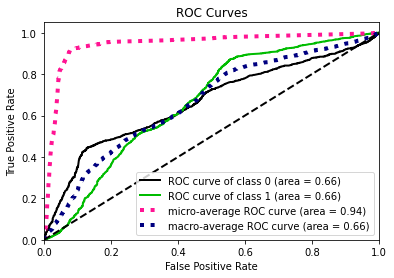

The AUC Value for the model is 0.6635981751907628
The Classification table is 
 [[    2  1725]
 [    0 19854]]
True Positive rate is 100 %
False Positive rate is 99.88419224088014 %
Model Accuracy is 0.9200685788425004


In [193]:
pr_train, pr_test, resp_train, resp_test = train_test_split(
        X, y, test_size=0.3, random_state=31171)

print('The size of the training set predictors is ', pr_train.shape)
print('The size of the training set response is ', resp_train.shape)
print('The size of the test set predictors is ', pr_test.shape)
print('The size of the test set response is ', resp_test.shape)

my_results_train = mymodel.fit(pr_train,resp_train)
predictions_test=my_results_train.predict(pr_test)
cm=confusion_matrix(resp_test, predictions_test)
print(cm)
print(classification_report(resp_test, predictions_test))

my_results_train = mymodel.fit(pr_train,resp_train)
predictions_test=my_results_train.predict(pr_test)
predictions_test_prob=my_results_train.predict_proba(pr_test)

fpr, tpr, tholds = metrics.roc_curve(resp_test, predictions_test_prob[:,1], pos_label = 1)
scplt.metrics.plot_roc(resp_test, predictions_test_prob)
plt.show()

print("The AUC Value for the model is", metrics.auc(fpr, tpr))
print("The Classification table is \n", confusion_matrix(resp_test, predictions_test))
print('True Positive rate is', 100,'%')
print('False Positive rate is',1725/1727*100,'%')
print('Model Accuracy is',accuracy_score(resp_test, predictions_test))

The accuracy is the holdout test is 92%.The True positive rate is very high at 100% out model False positive rate is also very high at 99%. This is due to the inbalanced proportion of Certified and Non-Certified respose values. 
Conclusion: This data set is not good for supervised regression due to inbalanced proportion of response values.  

#### Feature Importance of All the Predictors

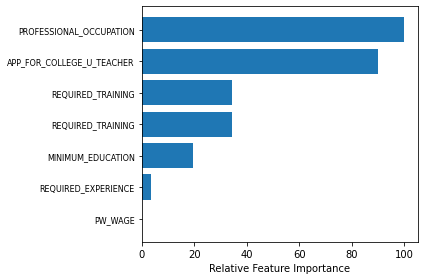

In [194]:
feature_importance = abs(mymodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

#### Let us take a look at how each feature effect the certification result

PROFESSIONAL_OCCUPATION

[Text(0.5, 0, 'PROFESSIONAL_OCCUPATION')]

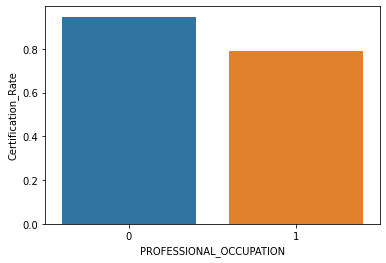

In [195]:
number_p=dat_select['CASE_STATUS_BI'].groupby(by = dat_select['PROFESSIONAL_OCCUPATION']).sum()
size_p=dat_select['CASE_STATUS_BI'].groupby(by = dat_select['PROFESSIONAL_OCCUPATION']).size()
per_p=(number_p/size_p).reset_index(name='Certification_Rate')
sns.barplot(data=per_p, x = 'PROFESSIONAL_OCCUPATION', y= 'Certification_Rate').set(xlabel='PROFESSIONAL_OCCUPATION')

Jobs considered as professional occupations(0) has higher chance to get certified than non professional occupations(1).

APP_FOR_COLLEGE_U_TEACHER

,APP_FOR_COLLEGE_U_TEACHER,Certification_Rate
0,0,0.938764
1,1,0.920331


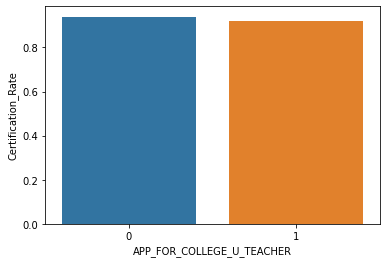

In [196]:
number_p1=dat_select['CASE_STATUS_BI'].groupby(by = dat_select['APP_FOR_COLLEGE_U_TEACHER']).sum()
size_p1=dat_select['CASE_STATUS_BI'].groupby(by = dat_select['APP_FOR_COLLEGE_U_TEACHER']).size()
per_p1=(number_p1/size_p1).reset_index(name='Certification_Rate')
sns.barplot(data=per_p1, x = 'APP_FOR_COLLEGE_U_TEACHER', y= 'Certification_Rate').set(xlabel='APP_FOR_COLLEGE_U_TEACHER', )
per_p1

College and University teachers get very simialr certification rate than those who are not.

PW_WAGE

,CASE_STATUS_BI,AVG WAGE
0,0,47.346604
1,1,48.272604


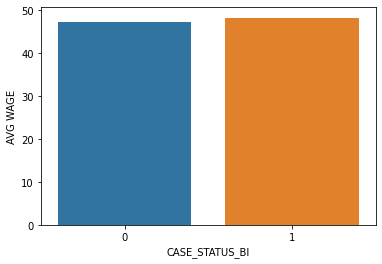

In [197]:
mean_wage = dat_select['PW_WAGE'].groupby(by = dat_select['CASE_STATUS_BI']).mean().reset_index(name='AVG WAGE')
sns.barplot(data=mean_wage, x = 'CASE_STATUS_BI', y= 'AVG WAGE').set(xlabel='CASE_STATUS_BI', )
mean_wage

On average, people who do get certified do not have much higher income than who do not get certified. Income is not a significant factor in terms of getting the certification. 

MINIMUN EDUCATION

In [ ]:
dat1=pd.read_csv('PERM_FY2020_Q31.csv')
dat1['CASE_STATUS_BI']=0
# change the response categories into only two levels: certifies vs denied
dat1.loc[(dat1['CASE_STATUS']=='Certified-Expired'),'CASE_STATUS_BI']='Certified'
dat1.loc[(dat1['CASE_STATUS']=='Certified'),'CASE_STATUS_BI']='Certified'
dat1.loc[(dat1['CASE_STATUS']=='Denied'),'CASE_STATUS_BI']='Not_Certified'
dat1.loc[(dat1['CASE_STATUS']=='Withdrawn'),'CASE_STATUS_BI']='Not_Certified'
dat1['CASE_STATUS_BI'].unique()


In [ ]:
dat1.loc[dat1.MINIMUM_EDUCATION.isnull(),'MINIMUM_EDUCATION']='None'
dat1['MINIMUM_EDUCATION'].unique()

In [ ]:
dat1['CASE_STATUS_BI']=='Certified'

,MINIMUM_EDUCATION,Certification_Rate
4,Master's,0.956434
2,Doctorate,0.949015
1,Bachelor's,0.942984
6,Other,0.903704
0,Associate's,0.797251
5,None,0.777187
3,High School,0.743335


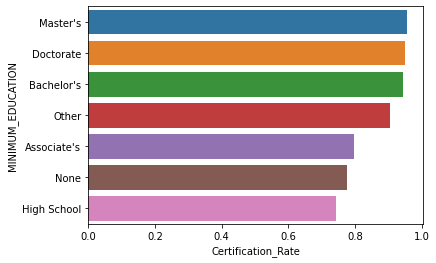

In [183]:
number_p2=dat1.loc[dat1['CASE_STATUS_BI']=='Certified','CASE_STATUS_BI'].groupby(by = dat1['MINIMUM_EDUCATION']).size().sort_values()
size_p2=dat1['CASE_STATUS_BI'].groupby(by = dat1['MINIMUM_EDUCATION']).size()
per_p2=(number_p2/size_p2).reset_index(name='Certification_Rate').sort_values('Certification_Rate', ascending=False)
sns.barplot(data=per_p2, y = 'MINIMUM_EDUCATION', x= 'Certification_Rate').set(xlabel='Certification_Rate' )
per_p2

In general for those who have Bachelor's or above degrees, the visa certification rate is very high(around 95%). Based on the data there seems to be no distinction between people with undergraduate and graduate degrees. The certification rate drops a lot for those who do not have a college level or higher degrees. 